### 5.1. Computer Vision
* RGB -> (Red, Green, Blue)  
* Torchvision, torchaudio, torchtext, torchData, etc
    1. ['torchvision'] - base domain library for pytorch computer vision
    2. 'torchvision.datasets' - get datasets and data loading function for computer vision
    3. 'torchvision.transform' - function for manipulating your vision data (images) to be suitable for use with an ML model
    4. 'torch.utils.data.Dataset' - base dataset class for pytorch
    5. 'torch.utils.data.DataLoader' - create a python iterable over a dataset

In [88]:
#Pytorch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor # Convert a PIL image or numpy.ndarray to Tensor

# Extra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Version
print(torch.__version__)
print(torchvision.__version__)

2.1.2+cu121
0.16.2+cu121


### 5.2. get the FashionMNIST dataset

In [89]:
# Getting a dataset
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', # where to download data do?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None # 
)

100%|██████████| 26421880/26421880 [00:06<00:00, 3962538.25it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 105945.86it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1497148.04it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [90]:
len(train_data), len(test_data)

(60000, 10000)

In [91]:
# See the first train data 
# [images(0~225) -> (C x H X W)] - channel, height, width
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [92]:
class_names =train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [93]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [94]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [95]:
# Check the shape
print(f'Image shape : {image.shape} -> ([Color channel, height, width])')
print(f'Image label : {class_names[label]}')


Image shape : torch.Size([1, 28, 28]) -> ([Color channel, height, width])
Image label : Ankle boot


Image shape: torch.Size([1, 28, 28])


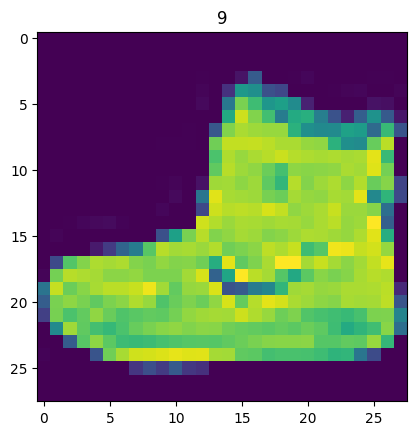

In [96]:
# Visualize data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}' )
# plt.imshow(image) # Not working -> TypeError: Invalid shape (1, 28, 28) for image data
plt.imshow(image.squeeze()) # image shape is [1,28,28] [color channels, height, width]
plt.title(label);
# image

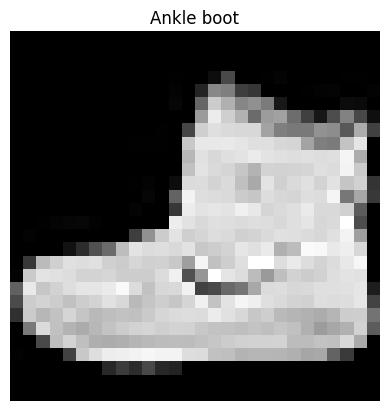

In [97]:
plt.imshow(image.squeeze(), cmap="gray") # image shape is [1,28,28] [color channels, height, width]
plt.title(class_names[label]);
plt.axis(False);

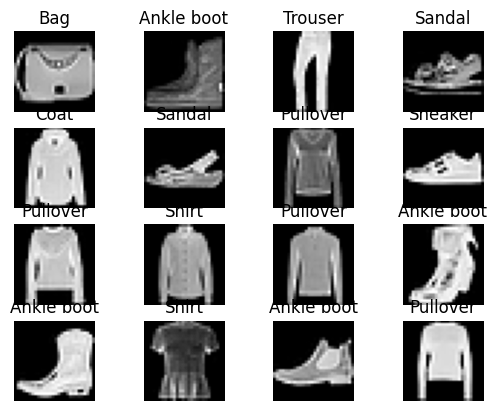

In [98]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figure=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    # print(i)
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

### 5.3. Preparing Dataloader
* DataLoader turns our datset into a python iterable
More specifically, we want to turn our data into batches (or mini-batches).
* why?
    1. for more computationally efficient to memory by breaking it down to 32 images
    2. gives our neural network more chances to update its gradients per epoch

In [99]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [100]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [101]:
# Let's check out what we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train DataLoaders: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test DataLoaders: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001A6970A8B90>, <torch.utils.data.dataloader.DataLoader object at 0x000001A696DA1D50>)
Length of train DataLoaders: 1875 batches of 32
Length of test DataLoaders: 313 batches of 32


In [102]:
# Check out what's insdie the training dataloader
'''
image input shape like:
[None, 28,28,1] -> None, Height, Width, Channel
[None, 1,28,28] -> None, Channel, Height, Width, 
    or
[32, 28,28,1] -> BatchSize, Height, Width, Channel
'''
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape 

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label : 1, label size: torch.Size([])


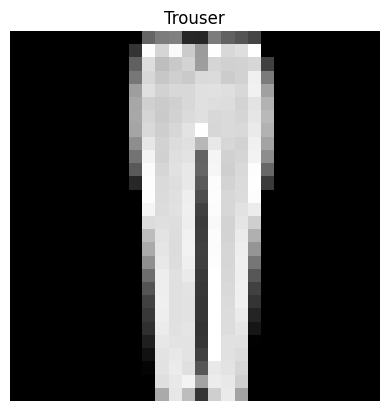

In [103]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label : {label}, label size: {label.shape}')

### 5.4. Build the a baseline model

In [104]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
# x.shape

# Flatten the sample
output = flatten_model(x)

# Print
print(f'Shape before flattening: {x.shape}') # -> [color channel, height, width]
print(f'Shape after flattening: {output.shape}') # -> [color channel, height*width]

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [105]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int
                 ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)
    

In [106]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# setup model with input parameters
model_cv0 = FashionMNISTModelV0(
    input_shape=784, # or '28*28' because 28*28 = 784
    hidden_units=10, # how many units
    output_shape=len(class_names) # one for every class
).to('cpu')

model_cv0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [107]:
# Check the model
dummy_x = torch.rand([1,1,28,28])
model_cv0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [108]:
model_cv0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 5.5. Build the a baseline model
* Loss function - crossentropy()
* optimizer - SGD()
* metric - accuracy()

In [109]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print('helper_functions.py already exist...')
else:
    print('Downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)
    

helper_functions.py already exist...


In [110]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_cv0.parameters(),
                            lr=0.1)

### 5.6. Creating a function to time our experiments

1. Model's performance (loss and accuracy)
2. How fast is runs

In [111]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device=None):
    '''Prints difference between start and end time'''
    total_time = end-start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time   

In [112]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


2.239999594166875e-05

### 5.7. Creating a training loop and test loop on 'batches' on data
1. loop through epochs
2. loop through training batches, perform training steps, calculate the train loss *per* batch
3. loop through testing batches, perform testing steps, calculate the test loss *per* batch
4. print
5. Time it all

In [113]:
# import tqdm for preogress bar
from tqdm.auto import tqdm

# Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

# Epochs
epochs = 3

# loop
for epoch in range(epochs):
    print(f'Epoch: {epoch}\n-----')
    '''
    Train
    '''
    train_loss = 0
    # loop for training batch
    for batch, (X,y) in enumerate(tqdm(train_dataloader)):
        model_cv0.train()
        # 1. forward
        y_pred = model_cv0(X)
        
        # 2. Calculate loss (/batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate train loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print
        if batch % 400 == 0:
            print(f'Look at {batch*len(X)}/{len(train_dataloader.dataset)} samples.')
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    '''
    Test
    '''
    test_loss, test_acc = 0,0
    model_cv0.eval()
    with torch.inference_mode():
        for X_test,y_test in tqdm(test_dataloader):
            # 1. Forward
            test_pred = model_cv0(X_test) # return logits
            
            # 2. Calculate loss
            test_loss += loss_fn(test_pred,y_test)
            
            # 3. Calculate acc
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1)) # return highest value from test_pred logits
            
            # 4. calculate the test loss average per batch
            test_loss /= len(test_dataloader)
            
            # 4. calculate the test loss average per batch
            test_acc /= len(test_dataloader)
            
    print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')
    
    # Calculate training time
    train_time_end_on_cpu = timer()
    total_train_time_model_cv0 = print_train_time(start=train_time_start_on_cpu,
                                                    end=train_time_end_on_cpu,
                                                    device=str(next(model_cv0.parameters()).device))

Epoch: 0
-----


  1%|          | 23/1875 [00:00<00:08, 230.00it/s]

Look at 0/60000 samples.


  6%|▋         | 120/1875 [00:00<00:07, 230.63it/s]

 24%|██▍       | 455/1875 [00:01<00:05, 268.20it/s]

Look at 12800/60000 samples.


 45%|████▌     | 846/1875 [00:03<00:03, 270.65it/s]

Look at 25600/60000 samples.


 66%|██████▌   | 1242/1875 [00:04<00:02, 269.37it/s]

Look at 38400/60000 samples.


 88%|████████▊ | 1647/1875 [00:06<00:00, 280.32it/s]

Look at 51200/60000 samples.


100%|██████████| 313/313 [00:00<00:00, 325.01it/s]



Train loss: 0.5893 | Test loss: 0.0007 | Test acc: 0.3003
Train time on cpu: 8.014 seconds
Epoch: 1
-----


  3%|▎         | 55/1875 [00:00<00:06, 270.83it/s]

Look at 0/60000 samples.


 23%|██▎       | 431/1875 [00:01<00:05, 279.42it/s]

Look at 12800/60000 samples.


 44%|████▍     | 829/1875 [00:02<00:03, 278.51it/s]

Look at 25600/60000 samples.


 67%|██████▋   | 1262/1875 [00:04<00:02, 264.66it/s]

Look at 38400/60000 samples.


 87%|████████▋ | 1633/1875 [00:06<00:00, 276.77it/s]

Look at 51200/60000 samples.


100%|██████████| 313/313 [00:00<00:00, 326.47it/s]



Train loss: 0.4762 | Test loss: 0.0010 | Test acc: 0.3003
Train time on cpu: 15.921 seconds
Epoch: 2
-----


  1%|▏         | 26/1875 [00:00<00:07, 252.39it/s]

Look at 0/60000 samples.


 24%|██▍       | 456/1875 [00:01<00:05, 255.05it/s]

Look at 12800/60000 samples.


 45%|████▌     | 850/1875 [00:03<00:03, 270.78it/s]

Look at 25600/60000 samples.


 66%|██████▌   | 1241/1875 [00:04<00:02, 258.20it/s]

Look at 38400/60000 samples.


 87%|████████▋ | 1632/1875 [00:06<00:00, 249.99it/s]

Look at 51200/60000 samples.


100%|██████████| 313/313 [00:00<00:00, 340.15it/s]



Train loss: 0.4552 | Test loss: 0.0013 | Test acc: 0.2804
Train time on cpu: 23.938 seconds


In [114]:
device='cpu'

In [115]:
### 5.8. Make prediction and get Model_cv0 result
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    '''Return a dictionary containing the results of model predicting on DataLoader'''
    loss, acc = 0,0
    model = model.to(device)
    model.eval()    
    with torch.inference_mode():
        for X, y in data_loader:
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)            
            # Make prediction
            y_pred = model(X)            
            # Accumulate the loss and acc per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))    
        # Scale loss and acc to find average loss/acc per batch 
        '''
        Point of position!!!
        '''
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {'model_name':model.__class__.__name__, # only works when model was created with a class
            'model_loss':loss.item(),
            'model_acc':acc}

In [116]:
# Calculate model_cv0 results on test dataset
model_cv0_results = eval_model(model=model_cv0.to(device),
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn)
model_cv0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5304171442985535,
 'model_acc': 80.25159744408946}

### 5.8. Setup device agnostic-code (GPU)

In [117]:
torch.cuda.is_available()

True

In [118]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 5.9. Model_cv1 : Builindg a better model with non-linear

In [119]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()            
        )
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [120]:
# Check the model device
next(model_cv0.parameters()).device

device(type='cpu')

In [121]:
# Create an instance of model_cv1
torch.manual_seed(42)
model_cv1 = FashionMNISTModelV1(input_shape=784, # this is the output of flatten after our 28*28 image goes in 
                                hidden_units=10,
                                output_shape=len(class_names)).to(device)
next(model_cv1.parameters()).device

device(type='cuda', index=0)

In [122]:
# setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()     # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_cv1.parameters(),  # tries to update our model's parameters to reduce the loss
                            lr=0.1)

### 5.10. Functionizing training and testing loop
* training loop - train_step()
* testing loop - test_step()

In [123]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    '''Performs a training with model trying to learn on data_loader.'''
    train_loss, train_acc = 0,0
    model.to(device)
    for batch, (X,y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        
        # 1. forward
        y_pred = model(X)
        
        # 2. Calculate loss (/batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}')

In [124]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    '''Performs a training with model trying to learn on data_loader.'''
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()    
    
    with torch.inference_mode():
        for X,y in data_loader:
            X, y = X.to(device), y.to(device)
            
            # 1. forward
            test_pred = model(X)
            
            # 2. Calculate loss (/batch)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
            
        # Divide total train loss and acc by length of train dataloader
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | test acc: {test_acc:.2f}')

In [125]:
torch.manual_seed(42)

from timeit import default_timer as timer 
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n---------------')
    train_step(model=model_cv1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_cv1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)

train_time_end_on_gpu = timer()
total_train_time_model_cv1 = print_train_time(start=train_time_start_on_gpu,
                                               end=train_time_end_on_gpu,
                                               device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------
Train loss: 1.09199 | Train acc: 61.34


 33%|███▎      | 1/3 [00:11<00:22, 11.42s/it]

Test loss: 0.95636 | test acc: 65.00
Epoch: 1
---------------
Train loss: 0.78101 | Train acc: 71.93


 67%|██████▋   | 2/3 [00:22<00:11, 11.27s/it]

Test loss: 0.72227 | test acc: 73.91
Epoch: 2
---------------
Train loss: 0.67027 | Train acc: 75.94


100%|██████████| 3/3 [00:35<00:00, 11.76s/it]

Test loss: 0.68500 | test acc: 75.02
Train time on cuda: 35.294 seconds


**Note** Sometimes, depending on data/hardware you might find that ur model trains fatseter on CPU than GPU

* Why?
1. overhead for copying data/model to and from the GPU outweight the compute benefits
2. hardware CPU performancec is greater than GPU


In [126]:
total_train_time_model_cv0

23.937693699990632

In [127]:
total_train_time_model_cv1

35.29357819998404

In [128]:
# Get model_cv1 results dictionary
model_cv1_results = eval_model(model=model_cv1,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn,
                               device=device)
model_cv1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

### 5.11. Convolutional Neural Network (CNN)
1. <span style='color:orange;font-weight:bold'> input layer </span> - takes in target images  and preprocesses them for further layers <span style='color:skyblue;font-weight:bold'> -> </span> input_shape = [batch_size, image_height, image_width, color_channel] or input_shape = [batch_size, color_channel image_height, image_width]
2. <span style='color:orange;font-weight:bold'> Convolutional layer </span> - Extracts/learns the most important features from target images <span style='color:skyblue;font-weight:bold'> -> </span> torch.nn.Convol
3. <span style='color:orange;font-weight:bold'> Hidden activation/non-linear activation </span> - Adds non-linearity to learned features <span style='color:skyblue;font-weight:bold'> -> </span> torch.nn.ReLU, 
4. <span style='color:orange;font-weight:bold'> Pooling layer </span> - Reduce the dimensionality of learned image features <span style='color:skyblue;font-weight:bold'> -> </span> Max(torch.nn.MaxPool2D()) or Average(torch.nn.AvgPool2d())
5. <span style='color:orange;font-weight:bold'> Output layer/linear </span> - Takes learned features and outputs them in shape of target labels **->** torch.nn.Linear(out_features=[number_of_classes]) (e.g. 3 for pizza, )
6. <span style='color:orange;font-weight:bold'> Output activation </span>  - Convert output logits to prediction probabilities <span style='color:skyblue;font-weight:bold'> -> </span> torch.sigmoid() (binary classification) or torch.softmax() (multi-class classification)

* ps. https://poloclub.github.io/cnn-explainer/

## Model recommend 
* Structured data (Excel, row and column data) => Gradient boosted models, Random Forests, ***XGBoost***
* Unstructured data (images, audio, language) => Convolutional Neural Networks, Transformers (***torchvision.models*** or ***HuggingFace Transformers***)


In [129]:
class FashionMNISTModelV2(nn.Module):
    ''' 
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    '''
    def __init__(self, 
                 input_shape=int,
                 hidden_units=int,
                 output_shape=int,
                 ):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values we can set ourselves in our NN's are called hyperparameter
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a a trick
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'Output shape of conv_block_2: {x.shape}')
        x = self.classifier(x)
        # print(f'Output shape of classifier: {x.shape}')
        return x

In [130]:
image.shape # 1 for black and white, if 3, then red, green, blue

torch.Size([1, 28, 28])

In [131]:
torch.manual_seed(42)
model_cv2 = FashionMNISTModelV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_names)).to(device)

In [132]:
# Stepping trough nn.Conv2d()
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [133]:
test_image.shape

torch.Size([3, 64, 64])

In [134]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),   # convolving kernel
                       stride=1,    # stride of the convolution
                       padding=1)   # padding added to all four sides of the input

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
# conv_output.shape # kernel_size (5,5) -> torch.Size([10, 60, 60])
# conv_output.shape # kernel_size (3,3) -> torch.Size([10, 62, 62]))
conv_output.shape # kernel_size (3,3), stride 2 -> torch.Size([10, 31, 31]))

torch.Size([10, 64, 64])

In [135]:
test_image.shape

torch.Size([3, 64, 64])

In [136]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 5.11. Stepping through nn.MaxPool2d()
<span style='color:orange;font-weight:bold'> nn.MaxPool2d() </span>

In [137]:
test_image.shape

torch.Size([3, 64, 64])

In [138]:
# print out original image shape without unsqueezed dimension
print(f'Test image original shape:{test_image.shape}')
print(f'Test image with unsqueezed dimension:{test_image.unsqueeze(0).shape}')

# Create a sample nn.Maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=4)

# Pass data through the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

# Pass data through the max pool layer
test_image_through_conv_and_max_layer = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv_layer() and max_pool_layer():{test_image_through_conv_and_max_layer.shape}')

Test image original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer():torch.Size([1, 10, 16, 16])


In [139]:
torch.manual_seed(42)

#Create a random tensor with a similar number of dimension to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f'\nRandom tensor:\n{random_tensor}')
print(f'\nRandom tensor shape:\n{random_tensor.shape}')

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape : {max_pool_tensor.shape}')


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape:
torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape : torch.Size([1, 1, 1, 1])


### Breakdown of torch.nn.Conv2d layer
* <span style='color:green;font-weight:bold'>Example code:</span> torch.nn.Conv2d(in_channel=3, out_channels=10, kernel_size=(3,3), stride=(1,1), padding=0)
* <span style='color:green;font-weight:bold'>Example code2[<span style='color:brown;font-weight:bold'>Same as above</span>]:</span> torch.nn.Conv2d(in_channel=3, out_channels=10, kernel_size=3, stride=1, padding=0)
* <span style='color:orange;font-weight:bold'> Hyperparameter </span> 
    1. <span style='color:orange;font-weight:bold'> in_channels: </span> - defines the number of input channels of the input data <span style='color:skyblue;font-weight:bold'> -> </span> (grayscale), 3, (RGB color images)
    2. <span style='color:orange;font-weight:bold'> out_channels: </span> - defines the number of output channels of the layer (could also be called <span style='color:crimson;font-weight:bold'> hidden units </span>) <span style='color:skyblue;font-weight:bold'> -> </span> 10,128, 256,512
    3. <span style='color:orange;font-weight:bold'> kernel_size (also referred to as filter size): </span> - determines the shape of the kernel (sliding windows) over the input <span style='color:skyblue;font-weight:bold'> -> </span> 3,5,7 (lowers values learn smaller features, higher values learn larger features)
    4. <span style='color:orange;font-weight:bold'> stride: </span> - The number of steps a filter takes across an image at a time (e.g. if strides=1, a filter moves across an image 1 pixel at a time) <span style='color:skyblue;font-weight:bold'> -> </span> 1 (default), 2
    5. <span style='color:orange;font-weight:bold'> padding: </span> - pads the target tensor with zeroes (if '<span style='color:brown;font-weight:bold'>same</span>' ) to preserve input shape. Or leave in the target tensor as is (if '<span style='color:brown;font-weight:bold'>valid</span>'), lowering output shape <span style='color:skyblue;font-weight:bold'> -> </span> 0,1,'same','valid'

* ps. https://poloclub.github.io/cnn-explainer/

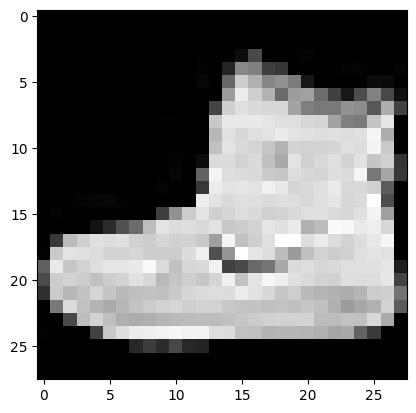

In [140]:
plt.imshow(image.squeeze(), cmap='gray')

In [141]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [142]:
rand_image_tensor.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [143]:
# pass image through  model
model_cv2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [144]:
10*7*7 # hidden_units * 

490

### 5.12 Setup a loss / eva / optimzier / train loop / test loop  for model_cv2

In [145]:
# setup loss / eval / optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cv2.parameters(),
                            lr=0.1)

In [146]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_cv2 = timer()

# Train / test model
epochs=3
for epoch in range(epochs):
    print(f'Epoch: {epoch} ----------------------')
    train_step(model=model_cv2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_cv2,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_model_cv2 = timer()
total_train_time_model_cv2 = print_train_time(start = train_time_start_model_cv2,
                                              end = train_time_end_model_cv2,
                                              device=device)    

Epoch: 0 ----------------------


Train loss: 0.60805 | Train acc: 78.07
Test loss: 0.40728 | test acc: 85.96
Epoch: 1 ----------------------
Train loss: 0.36269 | Train acc: 86.85
Test loss: 0.35095 | test acc: 87.37
Epoch: 2 ----------------------
Train loss: 0.32583 | Train acc: 88.11
Test loss: 0.32363 | test acc: 88.47
Train time on cuda: 43.099 seconds


In [147]:
# Get model_cv2 results
model_cv2_results = eval_model(
    model=model_cv2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_cv2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3236290216445923,
 'model_acc': 88.46845047923323}

In [148]:
model_cv1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [149]:
# compare model results and training time
from unittest import result
import pandas as pd
compare_results = pd.DataFrame([model_cv0_results,
                               model_cv1_results,
                               model_cv2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.530417,80.251597
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.323629,88.468450


In [150]:
# Add training time to result comparison
compare_results["training_time"]=[total_train_time_model_cv0,
                                  total_train_time_model_cv1,
                                  total_train_time_model_cv2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.530417,80.251597,23.937694
1,FashionMNISTModelV1,0.685001,75.019968,35.293578
2,FashionMNISTModelV2,0.323629,88.468450,43.099065


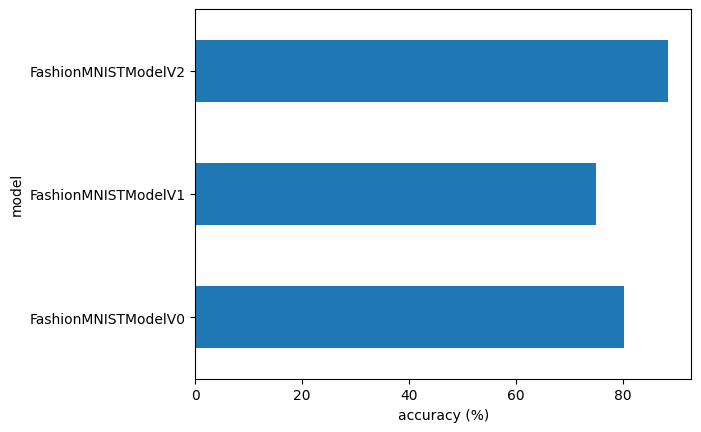

In [151]:
# Visualize our model result
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

### 5.12. Making predictions on random test samples
<!-- <span style='color:orange;font-weight:bold'> nn.MaxPool2d() </span> -->

In [152]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            
            # get pred_prob off the gpu for further calculation
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_prob to turn list into a tensor
    return torch.stack(pred_probs)            

In [153]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [154]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

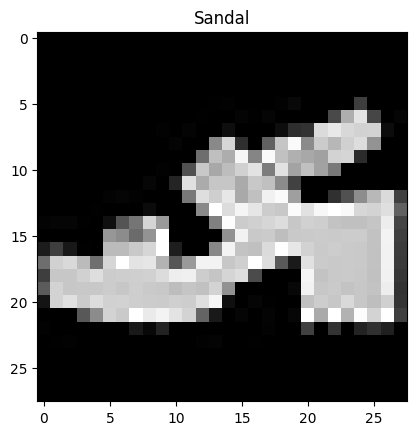

In [155]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [156]:
# Make predictions
pred_probs = make_predictions(model=model_cv2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.2334e-07, 3.8367e-09, 1.9461e-08, 7.4322e-08, 4.5208e-09, 9.9926e-01,
         1.0625e-06, 6.9541e-06, 3.4540e-05, 6.9293e-04],
        [2.7683e-01, 2.2583e-01, 2.2916e-03, 1.8304e-01, 2.3182e-01, 8.2942e-05,
         7.9029e-02, 2.4081e-04, 5.2685e-04, 3.1369e-04]])

In [157]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 7, 4, 3, 0, 4, 7, 1])

In [158]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [159]:
# import random
# # random.seed(42)
# test_samples=[]
# test_labels=[]
# for sample, label in random.sample(list(test_data), k=9):
#     test_samples.append(sample)
#     test_labels.append(label)

# # View the first sample shape
# test_samples[0].shape, test_labels

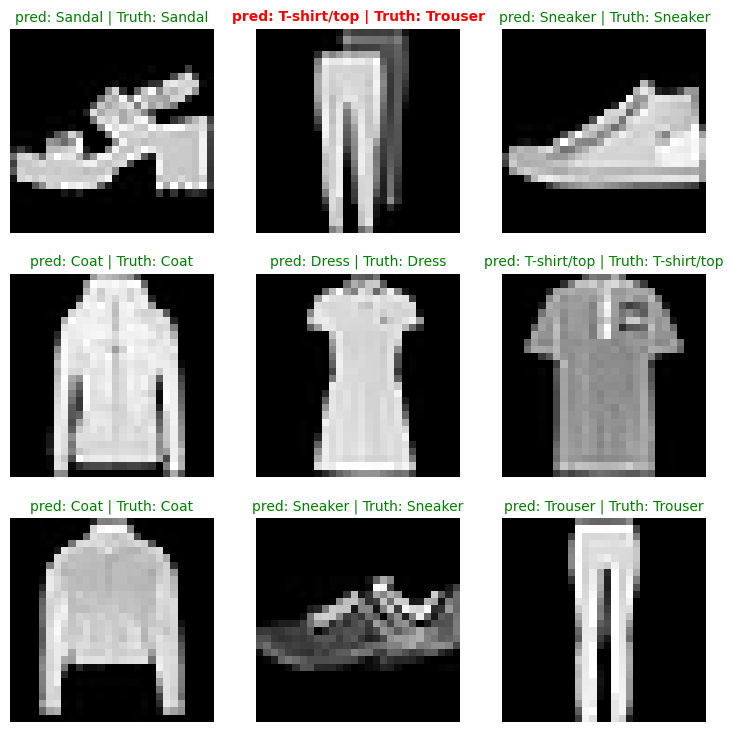

In [160]:
# plot prediction
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    
    # plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')
    
    # find the prediction (in text form, e.g. 'sandal')
    pred_label = class_names[pred_classes[i]]
    
    # get the truth label (in text form)
    truth_label = class_names[test_labels[i]]
    
    # Create a tilte for the plot
    title_text = f'pred: {pred_label} | Truth: {truth_label}'
    
    # Check for equality between pred and truth and change color of title test
    if pred_label==truth_label:
        plt.title(title_text, fontsize=10, c='g') # green text == True
    else: 
        plt.title(title_text, fontsize=10, c='r',fontweight='bold')
    plt.axis(False);

### 5.13. Making a confusion matrix for further prediction evaluation
1. make prediction with our model on the test dataset
2. make a confusion matrix '<span style='color:orange;font-weight:bold'>torchmetrics.ConfusionMatrix</span>'
3. plot the confusion matrix using '<span style='color:orange;font-weight:bold'> mlxtend.plotting.plot_confusion_matrix() </span>'

In [161]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. make prediction with trained model
y_preds=[]
model_cv2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc='Making prediction...'):
        # send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward
        y_logit = model_cv2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # put prediction on CPU for evalution
        y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]        

Making prediction...: 100%|██████████| 313/313 [00:01<00:00, 181.58it/s]


[tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 2, 6, 4, 2, 5, 6, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 4, 8, 6, 2, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 6, 4,
        1, 3, 5, 6, 4, 7, 9, 3]), tensor([8, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 8, 1, 0, 9, 3, 6,
        7, 9, 8, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 6, 4, 1, 3,
        3, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        2, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7])

In [162]:
len(y_pred_tensor)

10000

In [163]:
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mixtend version should be 0.19.0 or higher'
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.23.1


In [164]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [165]:
len(class_names)

10

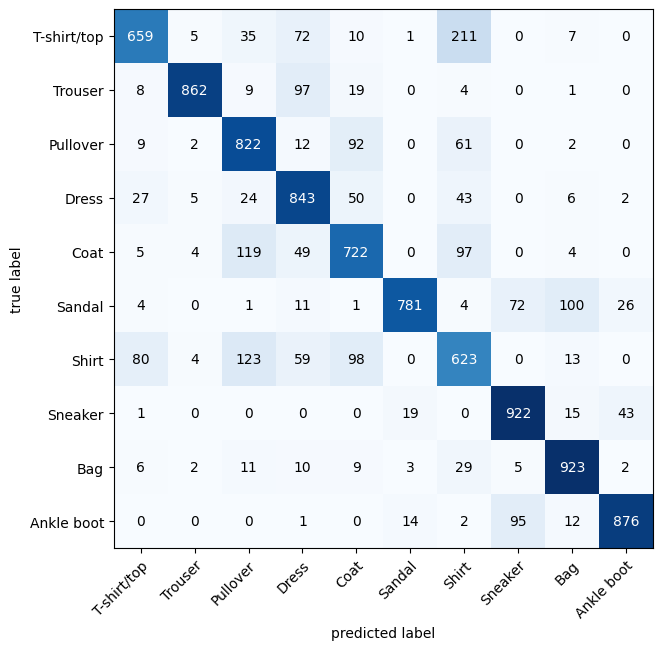

In [166]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare predictions to target
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib works only numpy
    class_names=class_names,
    figsize=(10,7)
)

In [167]:
confmat_tensor

tensor([[659,   5,  35,  72,  10,   1, 211,   0,   7,   0],
        [  8, 862,   9,  97,  19,   0,   4,   0,   1,   0],
        [  9,   2, 822,  12,  92,   0,  61,   0,   2,   0],
        [ 27,   5,  24, 843,  50,   0,  43,   0,   6,   2],
        [  5,   4, 119,  49, 722,   0,  97,   0,   4,   0],
        [  4,   0,   1,  11,   1, 781,   4,  72, 100,  26],
        [ 80,   4, 123,  59,  98,   0, 623,   0,  13,   0],
        [  1,   0,   0,   0,   0,  19,   0, 922,  15,  43],
        [  6,   2,  11,  10,   9,   3,  29,   5, 923,   2],
        [  0,   0,   0,   1,   0,  14,   2,  95,  12, 876]])

In [168]:
# Save and load
from pathlib import Path

# Create model_directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create mdoel save
MODEL_NAME = '03_pytorch_computer_vision_model_cv2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_cv2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_cv2.pth


In [169]:
model_cv2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.0805,  0.1832, -0.2826],
                        [ 0.4557,  0.1132, -0.1321],
                        [-0.2765,  0.0108,  0.3354]]],
              
              
                      [[[-0.4128,  0.3929, -0.0413],
                        [ 0.3861,  0.3277, -0.0247],
                        [ 0.0466,  0.3053, -0.1662]]],
              
              
                      [[[-0.1012,  0.1038, -0.0157],
                        [-0.7295, -0.7255,  0.3408],
                        [-0.9282, -0.6245,  0.0536]]],
              
              
                      [[[-0.7510, -1.0111, -0.6958],
                        [ 0.1230, -0.8176,  0.1198],
                        [ 0.2006,  0.0238,  0.3691]]],
              
              
                      [[[-0.0742,  0.2913,  0.1611],
                        [-0.3425,  0.2214, -0.1068],
                        [ 0.0743,  0.2141,  0.0827]]],
              
              
      

In [170]:
# Create a new instance
from json import load


torch.manual_seed(42)

loaded_model_cv2 = FashionMNISTModelV2(input_shape=1,
                                       hidden_units=10,
                                       output_shape=len(class_names))

# loaded in the save sate_dict()
loaded_model_cv2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Send the model to the target device
loaded_model_cv2 = loaded_model_cv2.to(device)
loaded_model_cv2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [171]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_cv2_results = eval_model(
    model=loaded_model_cv2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn    
)

loaded_model_cv2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3236289918422699,
 'model_acc': 88.46845047923323}

In [172]:
model_cv2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3236290216445923,
 'model_acc': 88.46845047923323}

In [173]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_cv2_results['model_loss']),
              torch.tensor(loaded_model_cv2_results['model_loss']),
              atol=1e-02, # absolute tolerance
              rtol=1e-03
)

tensor(True)